In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from persistent_cost.cone import cone_pipeline
from persistent_cost.utils.output import plot_persistence_barcodes, print_diagram, print_diagram_stats, diagram_stats, plot_diagrams

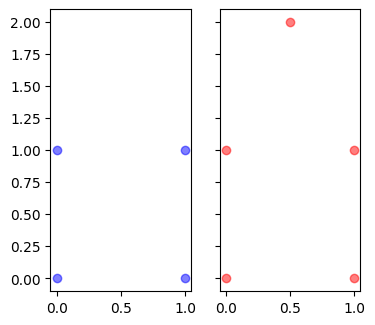

In [3]:
X = np.array([[0, 1], [1, 0], [0, 0], [1, 1]])
Y = np.array([[0, 1], [1, 0], [0, 0], [1, 1], [0.5, 2]])
f = np.array([0, 1, 2, 3])

fig, ax = plt.subplots(1,2, figsize=(4,8), sharex=True, sharey=True)
ax[0].scatter(X[:, 0], X[:, 1], color='blue', alpha = 0.5, label='X')
ax[1].scatter(Y[:, 0], Y[:, 1], color='red', alpha= 0.5, label='Y');
# equal axes
ax[0].set_aspect('equal', adjustable='box')
ax[1].set_aspect('equal', adjustable='box')

In [4]:
# Parámetros
maxdim = 1

dgm_coker, dgm_ker, dgm_cone, dgm_X, dgm_Y = cone_pipeline(X, Y, f, maxdim, perturbation=1e-8, cone_eps=0.0, tol=1e-10)
print("Kernel persistence diagram:")
print_diagram_stats(dgm_ker)
print_diagram(dgm_ker)
print("Cokernel persistence diagram:")
print_diagram_stats(dgm_coker)
print_diagram(dgm_coker)

Computing persistence diagrams...
Done.
Kernel persistence diagram:
Cokernel persistence diagram:
Dimension 0:
  Total points: 1
  Finite points: 1
  Infinite points: 0
  Average lifetime (finite): 1.1180
  Max lifetime (finite): 1.1180

Dimension 0:
  [0.         1.11803401]


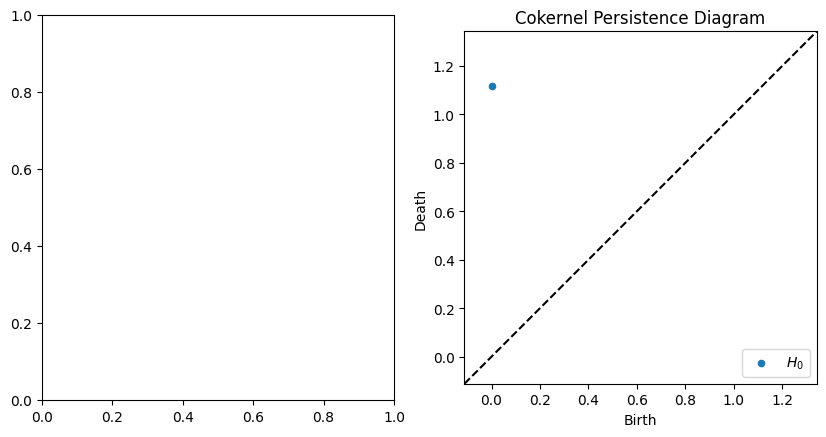

In [5]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
if not all([len(d)==0 for d in dgm_ker]): plot_diagrams(dgm_ker,ax=ax[0], title="Kernel Persistence Diagram")
if not all([len(d)==0 for d in dgm_coker]): plot_diagrams(dgm_coker,ax=ax[1], title="Cokernel Persistence Diagram")

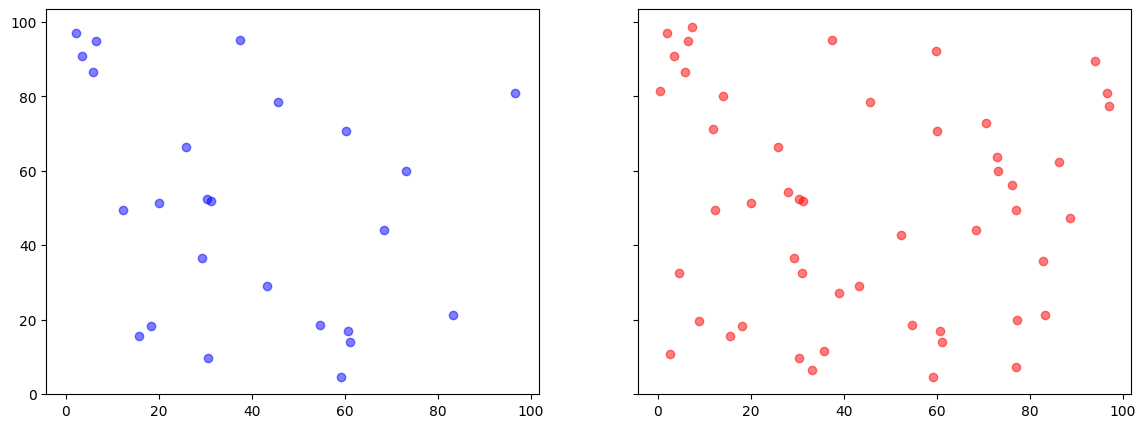

In [18]:
# Random 50 points cloud X, Y, f range(25)
np.random.seed(42)
Y = np.random.rand(50, 2) * 100
X = Y[:25]
f = np.arange(25)

fig, ax = plt.subplots(1,2, figsize=(14,5), sharex=True, sharey=True)
ax[0].scatter(X[:, 0], X[:, 1], color='blue', alpha = 0.5, label='X')
ax[1].scatter(Y[:, 0], Y[:, 1], color='red', alpha= 0.5, label='Y');

Computing persistence diagrams...
Done.
Cone persistence diagram:
Dimension 0:
  Total points: 50
  Finite points: 50
  Infinite points: 0
  Average lifetime (finite): 4.2777
  Max lifetime (finite): 19.6979

Dimension 1:
  Total points: 30
  Finite points: 30
  Infinite points: 0
  Average lifetime (finite): 3.2857
  Max lifetime (finite): 13.7789

Dimension 2:
  Total points: 3
  Finite points: 3
  Infinite points: 0
  Average lifetime (finite): 3.0058
  Max lifetime (finite): 3.7295

Kernel persistence diagram:
Dimension 0:
  Total points: 20
  Finite points: 20
  Infinite points: 0
  Average lifetime (finite): 2.4955
  Max lifetime (finite): 13.7789

Dimension 1:
  Total points: 3
  Finite points: 3
  Infinite points: 0
  Average lifetime (finite): 3.0058
  Max lifetime (finite): 3.7295

Cokernel persistence diagram:
Dimension 0:
  Total points: 25
  Finite points: 25
  Infinite points: 0
  Average lifetime (finite): 8.5555
  Max lifetime (finite): 19.6979

Dimension 1:
  Total poi

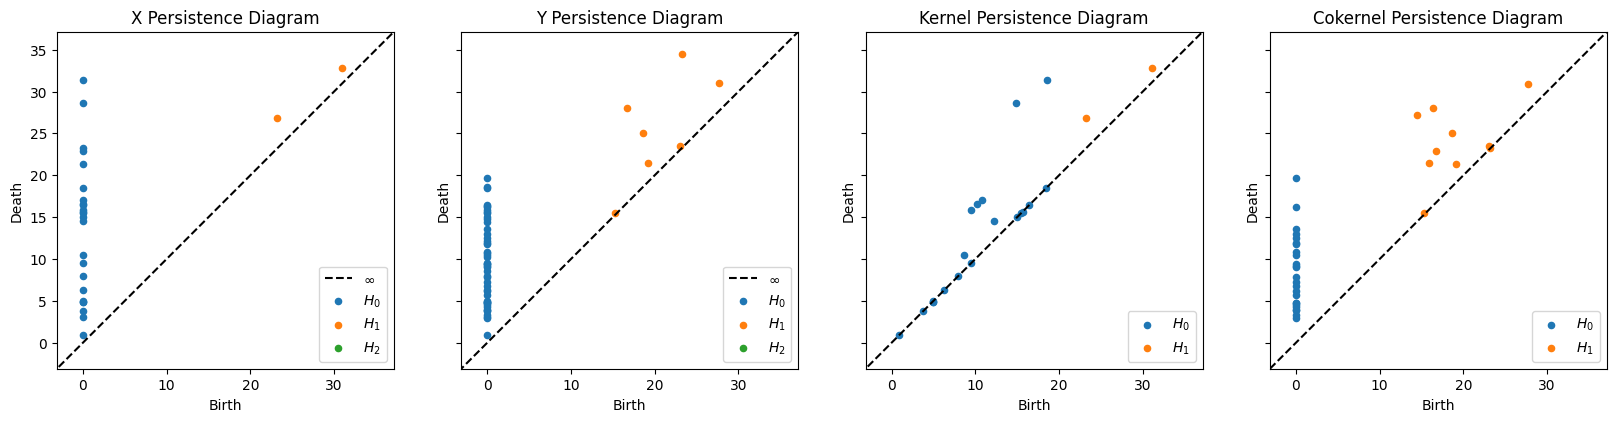

In [19]:
cone_eps = 1e-10 
tol = 1e-3
perturbation = 1e-4

maxdim = 2
dgm_coker, dgm_ker, dgm_cone, dgm_X, dgm_Y = cone_pipeline(X, Y, f, maxdim, perturbation=perturbation, cone_eps=cone_eps, tol=tol)

print("Cone persistence diagram:")
print_diagram_stats(dgm_cone)
print("Kernel persistence diagram:")
print_diagram_stats(dgm_ker)
print("Cokernel persistence diagram:")
print_diagram_stats(dgm_coker)

fig, ax = plt.subplots(1,4, figsize=(20,5), sharex=True, sharey=True)
plot_diagrams(dgm_X,ax=ax[0], title="X Persistence Diagram")
plot_diagrams(dgm_Y,ax=ax[1], title="Y Persistence Diagram")
plot_diagrams(dgm_ker,ax=ax[2], title="Kernel Persistence Diagram")
plot_diagrams(dgm_coker,ax=ax[3], title="Cokernel Persistence Diagram")

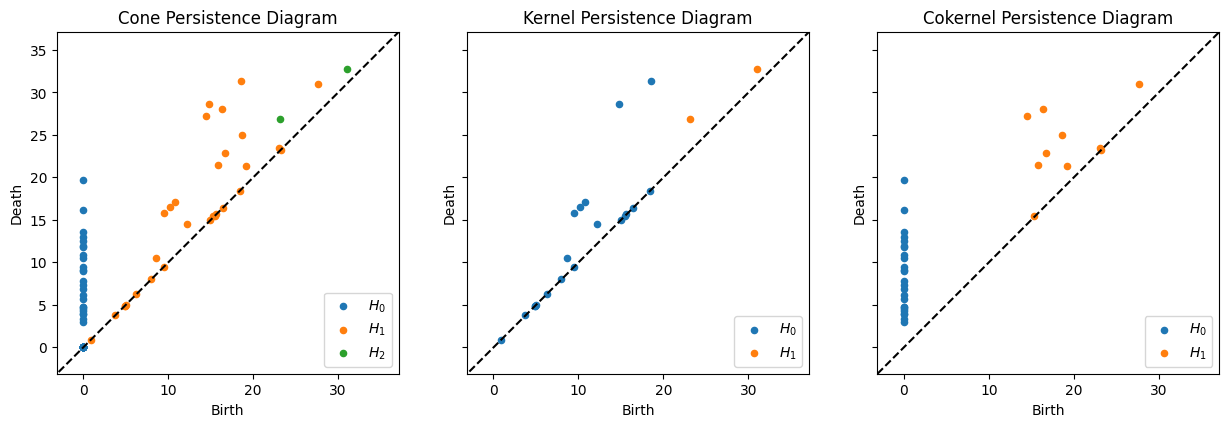

In [20]:
fig, ax = plt.subplots(1,3, figsize=(15,5), sharex=True, sharey=True)
plot_diagrams(dgm_cone, ax=ax[0], title="Cone Persistence Diagram")
plot_diagrams(dgm_ker, ax=ax[1], title="Kernel Persistence Diagram")
plot_diagrams(dgm_coker, ax=ax[2], title="Cokernel Persistence Diagram")
# H1 cone son Kern H0, Coker H1

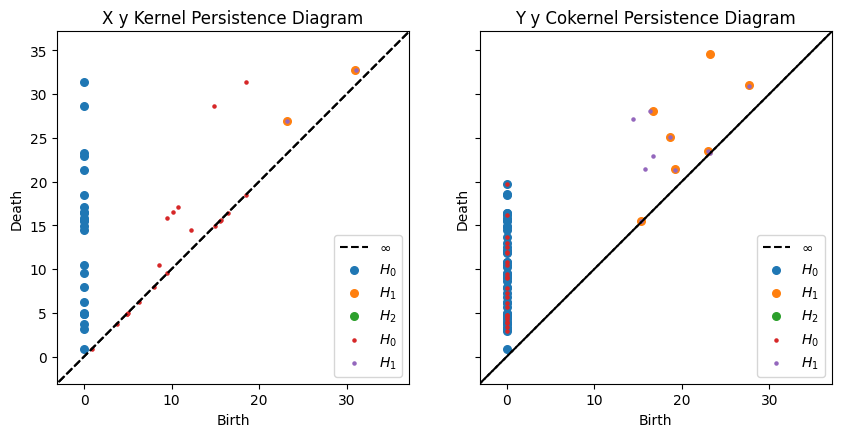

In [21]:
# print_diagram_stats(dgm_ker)
# print_diagram_stats(dgm_coker)
fig, ax = plt.subplots(1,2, figsize=(10,5), sharex=True, sharey=True)
plot_diagrams(dgm_X,ax=ax[0], marker="o", size=30)
plot_diagrams(dgm_ker,ax=ax[0], title="X y Kernel Persistence Diagram", marker=".")
plot_diagrams(dgm_Y,ax=ax[1],  marker="o", size=30)
plot_diagrams(dgm_coker,ax=ax[1], title="Y y Cokernel Persistence Diagram", marker=".")

In [24]:
# import numpy as np
# from totalpersistence import totalpersistence, kercoker_via_cone
# from totalpersistence.utils import general_position_distance_matrix, print_diagram
# import matplotlib.pyplot as plt

# cone_eps = 1e-10 
# tol = 1e-3
# perturbation = 1e-4

# # Compute distance matrices
# dX = general_position_distance_matrix(X, perturbation)*10
# dY = general_position_distance_matrix(Y, perturbation)*10


# # Calculate persistence diagrams
# coker_dgm, ker_dgm, cone_dgm, dgmX, dgmY = kercoker_via_cone(
#     dX, dY, f, maxdim=2, cone_eps=cone_eps, tol=tol
# )
# print("Cone persistence diagram v1:")
# print_diagram_stats(dgm_cone)

# print("Cone persistence diagram v2:")
# print_diagram_stats(cone_dgm)

# print("Kernel persistence diagram v1:")
# print_diagram_stats(dgm_ker)

# print("Kernel persistence diagram v2:")
# print_diagram_stats(ker_dgm)

# print("Cokernel persistence diagram v1:")
# print_diagram_stats(dgm_coker)

# print("Cokernel persistence diagram v2:")
# print_diagram_stats(coker_dgm)

In [ ]:
# tda.torus dataset
from tadasets import dsphere
from itertools import product

n1 = 30
n2 = 20
C1 = dsphere(n1, 1, r=1) 
C2 = dsphere(n2, 1, r=1) 

products = list(product(C1, C2))
torus = np.array([ [p[0][0], p[0][1], p[1][0], p[1][1]] for p in products])
circ = torus[:n1]

In [ ]:
f = np.arange(len(circ))

X = circ
Y = torus
maxdim = 2

dgm_coker, dgm_ker, dgm_cone, dgm_X, dgm_Y = cone_pipeline(X, Y, f, maxdim, perturbation=1e-10, cone_eps=0.0, tol=1e-7)
print("Cone persistence diagram:")
print_diagram_stats(dgm_cone)
print("Kernel persistence diagram:")
print_diagram_stats(dgm_ker)
print("Cokernel persistence diagram:")
print_diagram_stats(dgm_coker)
fig, ax = plt.subplots(1,3, figsize=(15,5), sharex=True, sharey=True)
plot_diagrams(dgm_cone, ax=ax[0], title="Cone Persistence Diagram")
if dgm_ker: plot_diagrams(dgm_ker, ax=ax[1], title="Kernel Persistence Diagram")
plot_diagrams(dgm_coker, ax=ax[2], title="Cokernel Persistence Diagram")

fig, ax = plt.subplots(1,2, figsize=(10,5), sharex=True, sharey=True)
if dgm_ker: plot_diagrams(dgm_ker, ax=ax[0], title="Kernel Persistence Diagram")
if dgm_coker: plot_diagrams(dgm_coker, ax=ax[1], title="Cokernel Persistence Diagram")

Computing persistence diagrams...


In [ ]:
# save each dim to csv
for i in range(len(dgm_ker)):
    np.savetxt(f"outputs/dgm_ker_torus_dim{i}.csv", dgm_ker[i], delimiter=",")
for i in range(len(dgm_coker)):
    np.savetxt(f"outputs/dgm_coker_torus_dim{i}.csv", dgm_coker[i], delimiter=",")

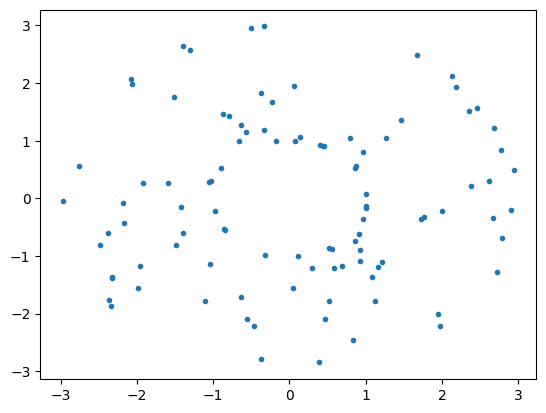

In [ ]:
# tda.torus dataset
from tadasets import torus
from itertools import product

torus = torus(100)
proy = torus[:, :2]
plt.plot(proy[:,0], proy[:,1],'.');

Computing persistence diagrams...
Done.
Cone persistence diagram:
Dimension 0:
  Total points: 0
  Finite points: 0
  Infinite points: 0
  Average lifetime (finite): nan
  Max lifetime (finite): nan

Dimension 1:
  Total points: 118
  Finite points: 118
  Infinite points: 0
  Average lifetime (finite): 0.1680
  Max lifetime (finite): 0.9646

Dimension 2:
  Total points: 32
  Finite points: 32
  Infinite points: 0
  Average lifetime (finite): 0.1528
  Max lifetime (finite): 0.7690

Kernel persistence diagram:
Dimension 0:
  Total points: 92
  Finite points: 92
  Infinite points: 0
  Average lifetime (finite): 0.1726
  Max lifetime (finite): 0.8048

Dimension 1:
  Total points: 29
  Finite points: 29
  Infinite points: 0
  Average lifetime (finite): 0.1555
  Max lifetime (finite): 0.7690

Cokernel persistence diagram:
Dimension 0:
  Total points: 0
  Finite points: 0
  Infinite points: 0
  Average lifetime (finite): nan
  Max lifetime (finite): nan

Dimension 1:
  Total points: 26
  Fini

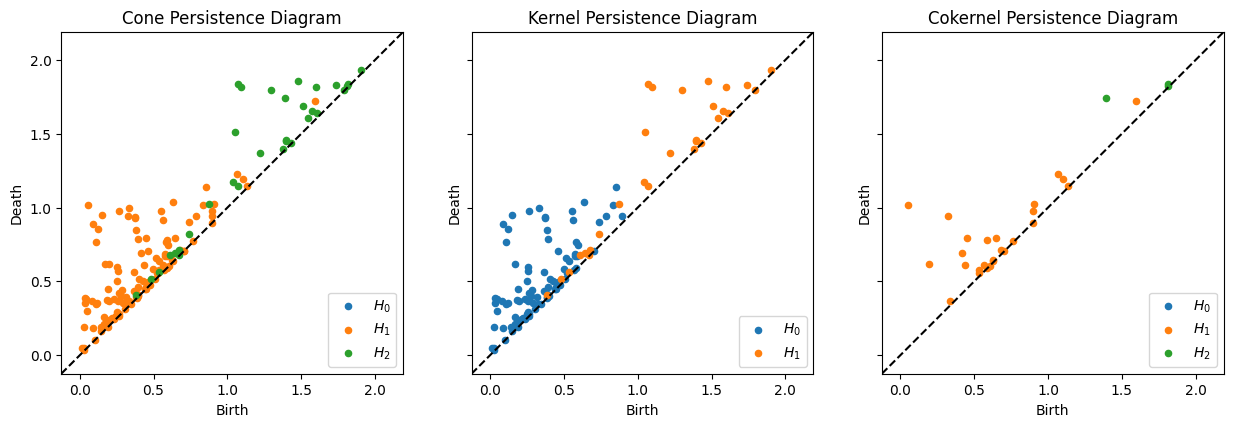

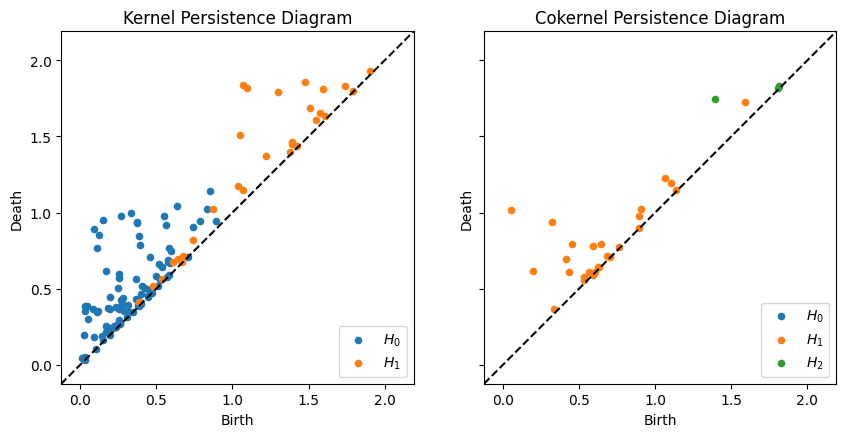

In [ ]:
X = torus
Y = proy
f = np.arange(len(proy))
maxdim = 2
dgm_coker, dgm_ker, dgm_cone, dgm_X, dgm_Y = cone_pipeline(X, Y, f, maxdim, perturbation=1e-10, cone_eps=0.0, tol=1e-7)
print("Cone persistence diagram:")
print_diagram_stats(dgm_cone)
print("Kernel persistence diagram:")
print_diagram_stats(dgm_ker)
print("Cokernel persistence diagram:")
print_diagram_stats(dgm_coker)
fig, ax = plt.subplots(1,3, figsize=(15,5), sharex=True, sharey=True)
if dgm_cone: plot_diagrams(dgm_cone, ax=ax[0], title="Cone Persistence Diagram")
if dgm_ker: plot_diagrams(dgm_ker, ax=ax[1], title="Kernel Persistence Diagram")
if dgm_coker: plot_diagrams(dgm_coker, ax=ax[2], title="Cokernel Persistence Diagram")

fig, ax = plt.subplots(1,2, figsize=(10,5), sharex=True, sharey=True)
if dgm_ker: plot_diagrams(dgm_ker, ax=ax[0], title="Kernel Persistence Diagram")
if dgm_coker: plot_diagrams(dgm_coker, ax=ax[1], title="Cokernel Persistence Diagram")

In [ ]:
for i in range(len(dgm_ker)):
    np.savetxt(f"outputs/dgm_ker_torus_dim{i}.csv", dgm_ker[i], delimiter=",")
for i in range(len(dgm_coker)):
    np.savetxt(f"outputs/dgm_coker_torus_dim{i}.csv", dgm_coker[i], delimiter=",")